In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('train_ctrUa4K.csv')

In [6]:
data.shape
len(data)

614

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.isnull().sum(axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# how to know dtype of each column
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
# check duplicates
data.duplicated().sum(axis = 0)

0

In [12]:
# persentage of missing value 
(data.isnull().sum(axis = 0)  / len(data)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Dealing with Missing values

In [13]:
# FEQ of gender
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
# fill gender with male
data['Gender'] = data['Gender'].fillna('Male')

In [15]:
# FEQ of Married
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
# no cross values. fill the missing with the most
pd.crosstab(data['Married'].isnull(), data['Dependents'].isnull())

Dependents,False,True
Married,,
False,599,12
True,0,3


In [17]:
data['Married'] = data['Married'].fillna('Yes')

In [18]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
pd.crosstab(data['Married'], data['Dependents'].isnull())

Dependents,False,True
Married,,
No,209,4
Yes,390,11


In [20]:
pd.crosstab(data['Married'], data['Dependents'])

Dependents,0,1,2,3+
Married,,,,
No,171,23,8,7
Yes,174,79,93,44


In [21]:
# For not married people,
no_dep = data[(data['Married'] == 'No') & (data['Dependents'].isnull())].index.tolist()
no_dep

[293, 332, 355, 597]

In [22]:
# fillna with 0 dependents
data.loc[no_dep,'Dependents'] ='0'

In [23]:
pd.crosstab(data['Gender'], data['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,82,19,7,3
Male,267,83,94,48


In [24]:
pd.crosstab(data['Gender'], data['Dependents'].isnull())

Dependents,False,True
Gender,,
Female,111,1
Male,492,10


In [25]:
# most of the missing values of dependents are Male. so FIllna with 0
data['Dependents'] = data['Dependents'].fillna('0')

In [26]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
# fill self_employed with 'no'
data['Self_Employed'] = data['Self_Employed'].fillna('No')

In [28]:
pd.crosstab(data['LoanAmount'].isnull(),data['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,1,2,2,4,3,42,3,13,493,15
True,0,0,0,0,0,2,1,0,19,0


In [29]:
data.groupby(data['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [30]:
loan_360 = data[(data['Loan_Amount_Term'] == 360) & (data['LoanAmount'].isnull())].index.tolist()
loan_180 = data[(data['Loan_Amount_Term'] == 180) & (data['LoanAmount'].isnull())].index.tolist()
loan_240 = data[(data['Loan_Amount_Term'] == 240) & (data['LoanAmount'].isnull())].index.tolist()
loan_480 = data[(data['Loan_Amount_Term'] == 480) & (data['LoanAmount'].isnull())].index.tolist()

In [31]:
# fill the na with mean
data.loc[loan_360,'LoanAmount'] = 144.42
data.loc[loan_180,'LoanAmount'] = 130
data.loc[loan_240,'LoanAmount'] = 130
data.loc[loan_480,'LoanAmount'] = 137.18

In [32]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(360)

In [34]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [36]:
pd.crosstab(data['Gender'],data['Credit_History'])

Credit_History,0.0,1.0
Gender,,
Female,17,84
Male,72,391


In [37]:
pd.crosstab(data['Education'],data['Credit_History'])

Credit_History,0.0,1.0
Education,,
Graduate,63,380
Not Graduate,26,95


In [38]:
pd.crosstab(data['Married'],data['Credit_History'])

Credit_History,0.0,1.0
Married,,
No,32,167
Yes,57,308


In [39]:
pd.crosstab(data['Dependents'],data['Credit_History'])

Credit_History,0.0,1.0
Dependents,,
0,50,281
1,14,76
2,14,81
3+,11,37


In [40]:
data['Credit_History'] = data['Credit_History'].fillna(1)

In [41]:
data_dummies = pd.get_dummies(data.drop(['Loan_ID'], axis = 1),drop_first = True)
data_dummies

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,144.42,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.00,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.00,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.00,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.00,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.00,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.00,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.00,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.00,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [42]:
# # split all nan to test dataset
# test = data_dummies[data_dummies['Credit_History'].isnull()]
# test_index = test.index.tolist()
# test.shape

In [43]:
# train = data_dummies[data_dummies['Credit_History'].notna()]
# train.shape

In [44]:
# X_train = train.drop(['Credit_History'], axis = 1)
# Y_train = train['Credit_History']

In [45]:
# X_test = test.drop(['Credit_History'], axis = 1)
# Y_test = test['Credit_History']

In [46]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression()
# log_reg.fit(X_train,Y_train)

In [47]:
# prediction = log_reg.predict(X_test)
# prediction 

In [48]:
# test['Credit_History'] = prediction
# test.isnull().sum()

In [49]:
# data_new = pd.concat([train,test], axis = 0)
# data_new

In [50]:
# # split back into train and test data
# train_new = data_new.head(len(train_df))
# test_new = data_new.tail(len(test_df))
# test_new.drop(['Loan_Status_Y'],axis = 1, inplace = True)
# test_new

In [51]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.42,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.00,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.00,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.00,360.0,1.0,Urban,Y


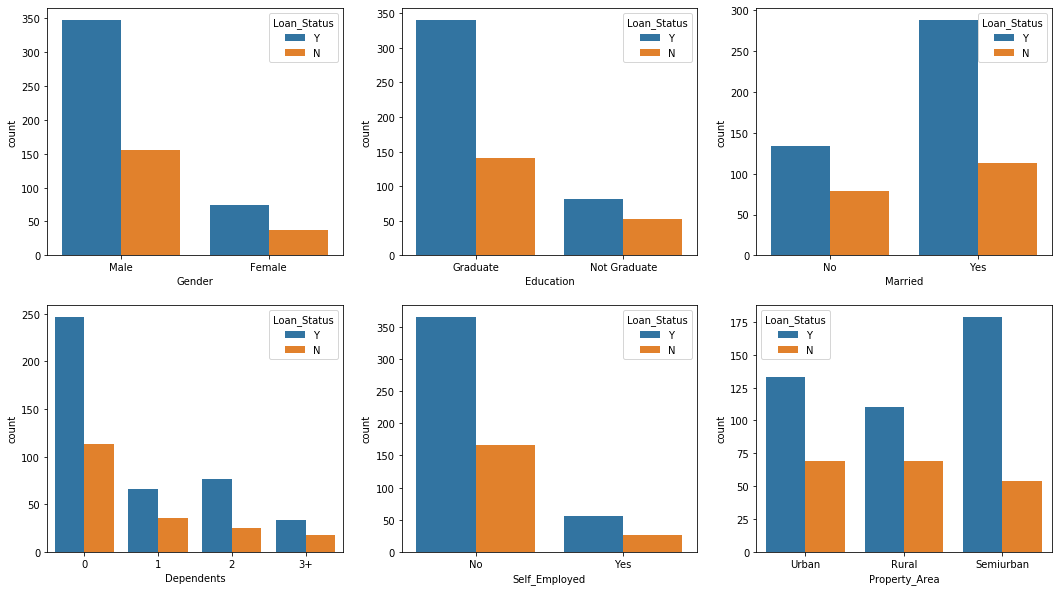

In [52]:
# All categorical data with credit history
plt.figure(figsize = (18,10))
plt.subplot(231)
sns.countplot(data.Gender,hue = data.Loan_Status)
plt.subplot(232)
sns.countplot(data.Education, hue = data.Loan_Status)
plt.subplot(233)
sns.countplot(data.Married,hue = data.Loan_Status)
plt.subplot(234)
sns.countplot(data.Dependents,hue = data.Loan_Status)
plt.subplot(235)
sns.countplot(data.Self_Employed,hue = data.Loan_Status)
plt.subplot(236)
sns.countplot(data.Property_Area,hue = data.Loan_Status)


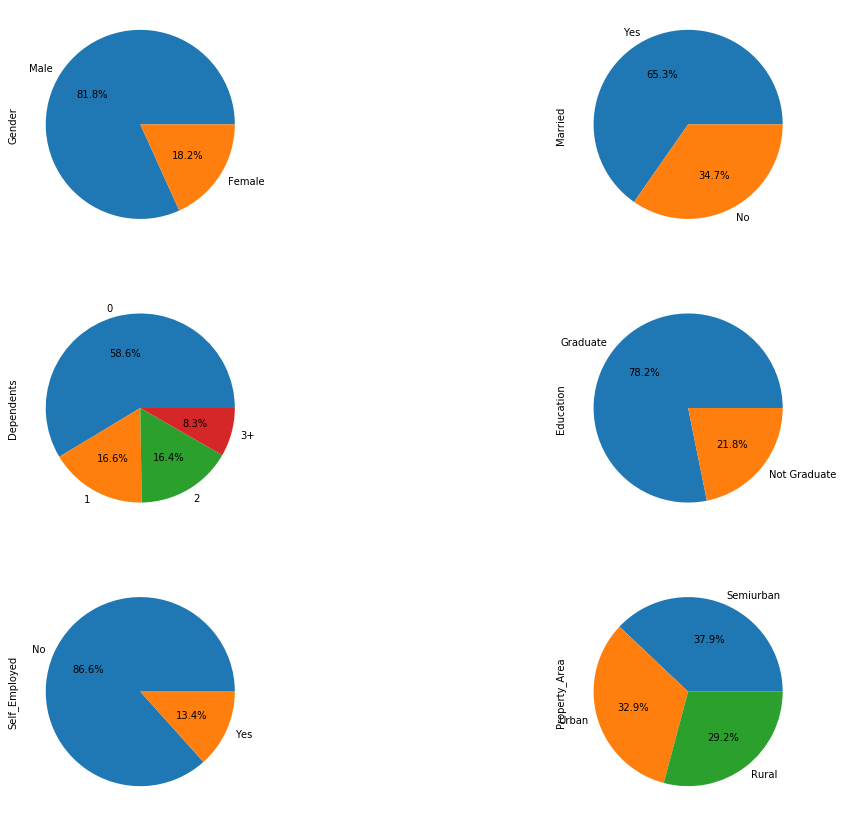

In [53]:
# overall raito of all feartures
plt.figure(figsize = (18,20))
plt.subplot(421)
data.Gender.value_counts().plot.pie(autopct="%.1f%%")
plt.subplot(422)
data.Married.value_counts().plot.pie(autopct="%.1f%%")
plt.subplot(423)
data.Dependents.value_counts().plot.pie(autopct="%.1f%%")
plt.subplot(424)
data.Education.value_counts().plot.pie(autopct="%.1f%%")
plt.subplot(425)
data.Self_Employed.value_counts().plot.pie(autopct="%.1f%%")
plt.subplot(426)
data.Property_Area.value_counts().plot.pie(autopct="%.1f%%")
# plt.subplot(427)
# data.Loan_Status_Y.value_counts().plot.pie(autopct="%.1f%%")

In [91]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.270326,342.410423,0.855049
std,6109.041673,2926.248369,84.045922,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


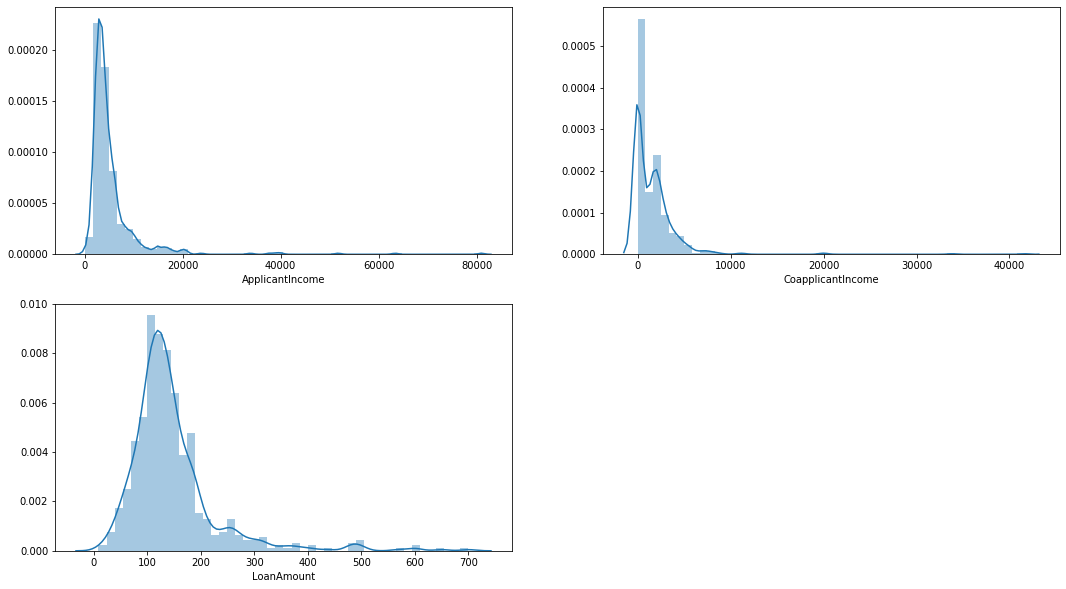

In [99]:
# All numeric data boxplot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.distplot(data.ApplicantIncome)
plt.subplot(222)
sns.distplot(data.CoapplicantIncome)
plt.subplot(223)
sns.distplot(data.LoanAmount)

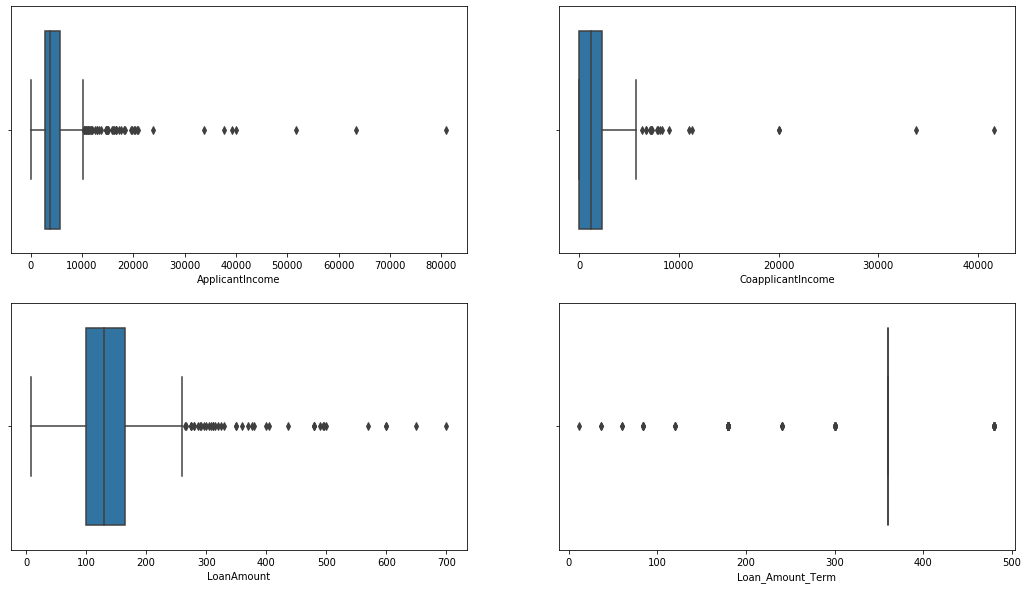

In [54]:
# All numeric data boxplot
plt.figure(figsize = (18,10))
plt.subplot(221)
sns.boxplot(x = data.ApplicantIncome)
plt.subplot(222)
sns.boxplot(data.CoapplicantIncome)
plt.subplot(223)
sns.boxplot(data.LoanAmount)
plt.subplot(224)
sns.boxplot(data.Loan_Amount_Term)

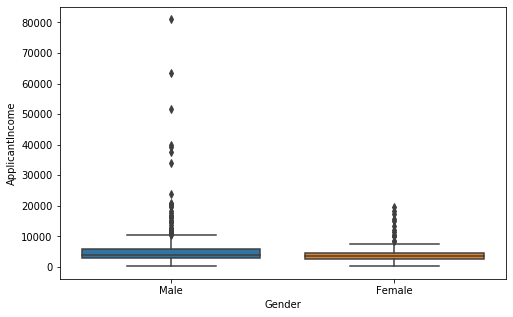

In [55]:
# income boxplot vs gender
plt.figure(figsize = (8,5))
sns.boxplot(x =data['Gender'], y = data['ApplicantIncome'])

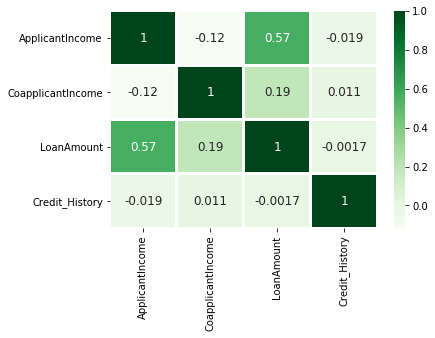

In [56]:
# correlation between ApplicantIncome','CoapplicantIncome','LoanAmount'
corr = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']
sns.heatmap(data[corr].corr(), vmax = 1, annot_kws ={'Size':12}, annot = True, linewidth = 2, xticklabels = 1,cmap = 'Greens')

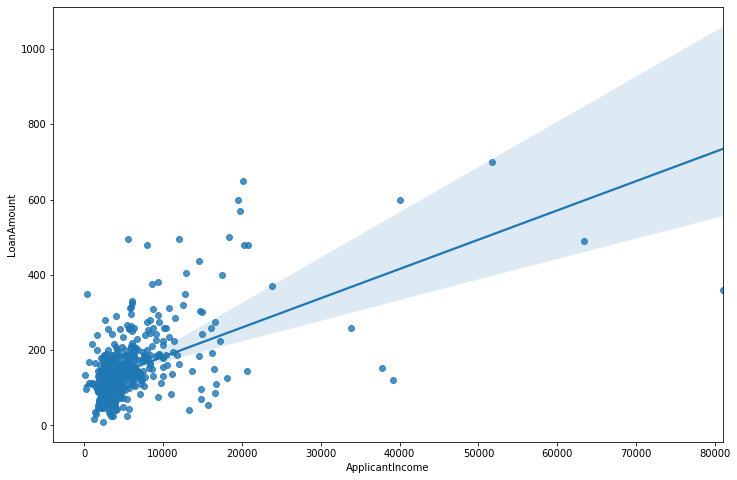

In [57]:
plt.figure(figsize = (12,8))
sns.regplot(x = 'ApplicantIncome' , y = 'LoanAmount', data = data)

In [58]:
data_dummies

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,144.42,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.00,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.00,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.00,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.00,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.00,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.00,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.00,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.00,360.0,1.0,1,1,0,1,0,0,0,0,1,1


Outlier definition:
a point which falls more than 1.5 times the interquartile range above the thrid quartile or below the first quartile

# SVM Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [62]:
X = data_dummies.drop('Loan_Status_Y',axis = 1)
y = data_dummies['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
print('Training score:',model.score(X_train,y_train))
print('Testing score:',model.score(X_test,y_test))

Training score: 0.6822810590631364
Testing score: 0.7154471544715447


In [60]:
predictions = model.predict(X_test)

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.72      1.00      0.83        88

    accuracy                           0.72       123
   macro avg       0.36      0.50      0.42       123
weighted avg       0.51      0.72      0.60       123



A kernel function is a "similarity' function that corresponds to an inner product in some expanded feature space 
plug values into kernal to get the high dimensional relationships
one way to deal with overlapping dasta is to use a svm with a radial kernel
gamma, which is determiend by Cross Validation 

In [62]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.673, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.673, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.677, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.673, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.622, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.684, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.643, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [63]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [64]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.33      0.03      0.05        35
           1       0.72      0.98      0.83        88

    accuracy                           0.71       123
   macro avg       0.53      0.50      0.44       123
weighted avg       0.61      0.71      0.61       123



In [85]:
# param_grid = { 'kernel': ['linear', 'poly']}  
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# grid.fit(X_train, y_train) 

In [84]:
# # print best parameter after tuning 
# print(grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(grid.best_estimator_) 

In [96]:
# grid_predictions = grid.predict(X_test) 
  
# # print classification report 
# print(classification_report(y_test, grid_predictions))

In [87]:
param_grid = {'C': [1],  
              'gamma': [0.001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1, gamma=0.001, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.758, total= 1.1min
[CV] C=1, gamma=0.001, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.776, total= 2.3min
[CV] C=1, gamma=0.001, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s


[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.786, total= 1.1min
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.776, total= 2.8min
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.745, total=  47.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1], 'gamma': [0.001], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [92]:
print(grid.best_estimator_) 

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [93]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        38
           1       0.79      1.00      0.89        85

    accuracy                           0.82       123
   macro avg       0.90      0.71      0.74       123
weighted avg       0.86      0.82      0.79       123



In [94]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
print('Training score:',model.score(X_train,y_train))
print('Testing score:',model.score(X_test,y_test))

Training score: 0.7922606924643585
Testing score: 0.8211382113821138


# Decision tree

In [64]:
from sklearn import tree
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [65]:
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [66]:
print('Training score:',tree.score(X_train,y_train))
print('Testing score:',tree.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 1.0
Testing score: 0.6991869918699187
testing data Accuracy: 0.6991869918699187


In [67]:
# import graphviz 
# dot_data = tree.export_graphviz(tree, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render(data) 

In [68]:
from sklearn import tree
from sklearn import metrics
# Cross_entropy loss (sum of proportion of elements in that class times the log of the proportion in that class)
tree_1 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
tree_1.fit(X_train, y_train)
y_pred = tree_1.predict(X_test)

In [69]:
print('Training score:',tree_1.score(X_train,y_train))
print('Testing score:',tree_1.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 0.8207739307535642
Testing score: 0.7886178861788617
testing data Accuracy: 0.7886178861788617


# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [71]:
X = data_dummies.drop('Loan_Status_Y',axis = 1)
y = data_dummies['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Training score:',rf.score(X_train,y_train))
print('Testing score:',rf.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 0.8268839103869654
Testing score: 0.8048780487804879
testing data Accuracy: 0.8048780487804879


In [73]:
feature_imp = pd.Series(rf.feature_importances_,data_dummies.drop('Loan_Status_Y', axis = 1).columns).sort_values(ascending=False)
feature_imp

Credit_History             0.486571
ApplicantIncome            0.113867
LoanAmount                 0.099231
CoapplicantIncome          0.091285
Loan_Amount_Term           0.050164
Property_Area_Semiurban    0.036691
Married_Yes                0.023444
Education_Not Graduate     0.019155
Gender_Male                0.016901
Dependents_1               0.015473
Property_Area_Urban        0.014427
Self_Employed_Yes          0.013753
Dependents_2               0.009593
Dependents_3+              0.009446
dtype: float64

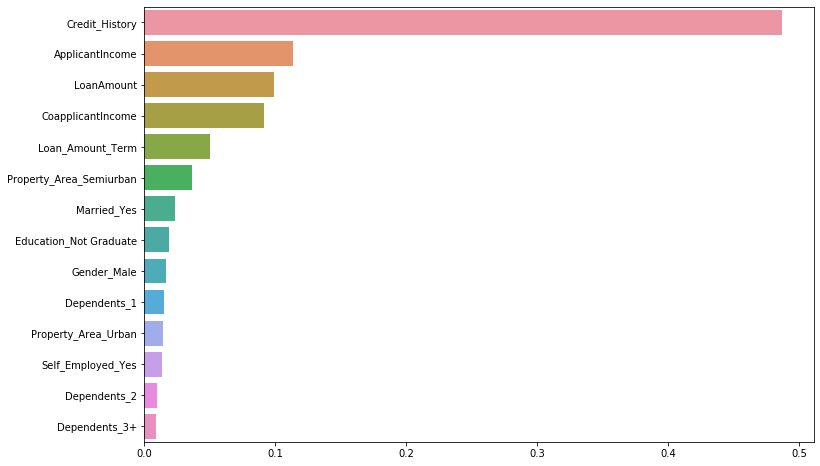

In [74]:
plt.figure(figsize = (12,8))
sns.barplot(x = feature_imp, y = feature_imp.index)

In [79]:
X = data_dummies.drop(['Dependents_3+','Loan_Status_Y'], axis = 1)
y = data_dummies[['Loan_Status_Y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_1 = RandomForestClassifier(n_estimators=100,max_depth=5)
rf_1.fit(X_train, y_train)
y_pred = rf_1.predict(X_test)
print('Training score:',rf_1.score(X_train,y_train))
print('Testing score:',rf_1.score(X_test,y_test))
print("testing data Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training score: 0.8126272912423625
Testing score: 0.8373983739837398
testing data Accuracy: 0.8373983739837398
